In [2]:
!pip install keras --upgrade

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.3 MB 2.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.3 MB 5.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
from keras.models import Sequential
from keras.layers import Dense

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import math

In [180]:
house_data = pd.read_csv('../datasets/kc_house_data.csv')

In [181]:
#Splitting data set into training and testing
#Shuffles the data sets to avoid biasis (sample function, 1 = 100% of the data)
house_data = house_data.sample(frac = 1).reset_index(drop = True)

In [182]:
data = house_data['sqft_living']
labels = house_data ['price']

In [183]:
data = np.array(data)
labels = np.array(labels)

In [184]:
data = data.reshape(-1, 1)

In [185]:
ss = preprocessing.StandardScaler()

data = ss.fit_transform(data)

In [187]:
train_data = data[:-4322]
test_data = data[-4322:]

train_labels = labels[:-4322]
test_labels = labels[-4322:]




#--- ISSUE data is converted to integer losing all the float values ---#
#x_data_amount = x_data.shape #outputs 21613
# Get the number of data points
#data_amount = data.shape[0]  # Extract integer value (21613)
#labels_amount = labels.shape[0]  # Ensure we get an integer for y_data as well

# Compute split index
#data_split = len(data_amount) * 0.2
#labels_split = int(labels_amount * 0.2)  # Should be the same as x_data_split if x and y match

#80:20 Train:Test split
#train_data = data[:-data_split] //-4322
#test_data = data[-data_split:] //-4322

#train_labels = labels[:-labels_split] //-4322
#test_labels = labels[-labels_split:] //-4322



In [188]:
#Shuffling of train data - to create random order 
order = np.argsort(np.random.random(train_labels.shape))

In [189]:
train_data = train_data[order]
train_labels = train_labels[order]

In [190]:
print("Training set: {}".format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

Training set: (17291, 1)
Testing set: (4322, 1)


In [127]:
#--- Linear regression model ---#

regr = linear_model.LinearRegression()
regr.fit(train_data, train_labels)
train_predictions = regr.predict(train_data)
test_predictions = regr.predict(test_data) #y = bias+coef*x

print('Coefficients: \n', regr.coef_)
print('bias: \n', regr.intercept_)

mse = mean_squared_error(test_labels, test_predictions)

print("Means squared error: %.2f" % mse)

math.sqrt(mse) #Converted to dollars


print('R^2 score for training data: %.2f' % r2_score(train_labels, train_predictions))
print('R^2 score for test data: %.2f' % r2_score(test_labels, test_predictions))


Coefficients: 
 [259788.97680134]
bias: 
 540118.1501480781
Means squared error: 68076522750.65
R^2 score for training data: 0.49
R^2 score for test data: 0.49


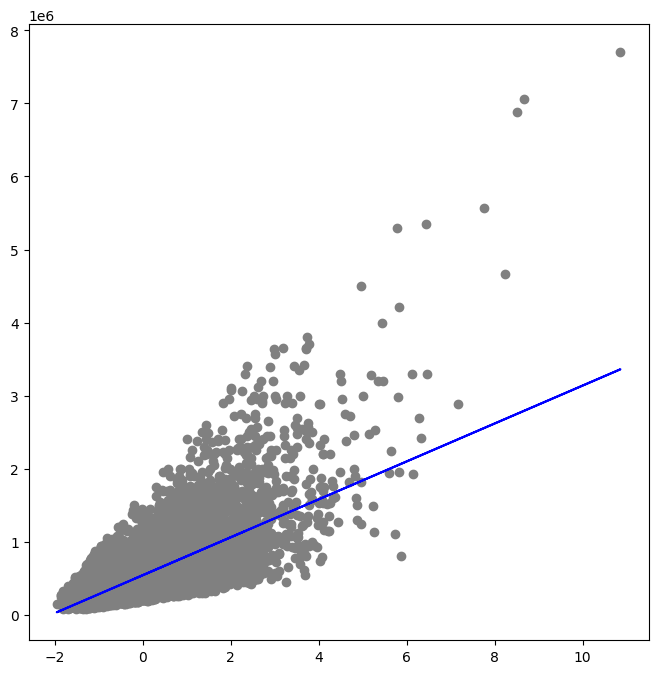

In [130]:
plt.figure(figsize=(8, 8))

plt.scatter(train_data,
            train_labels,
            color = 'grey')

plt.plot(train_data,
         train_predictions,
         color= 'blue')
plt.show()


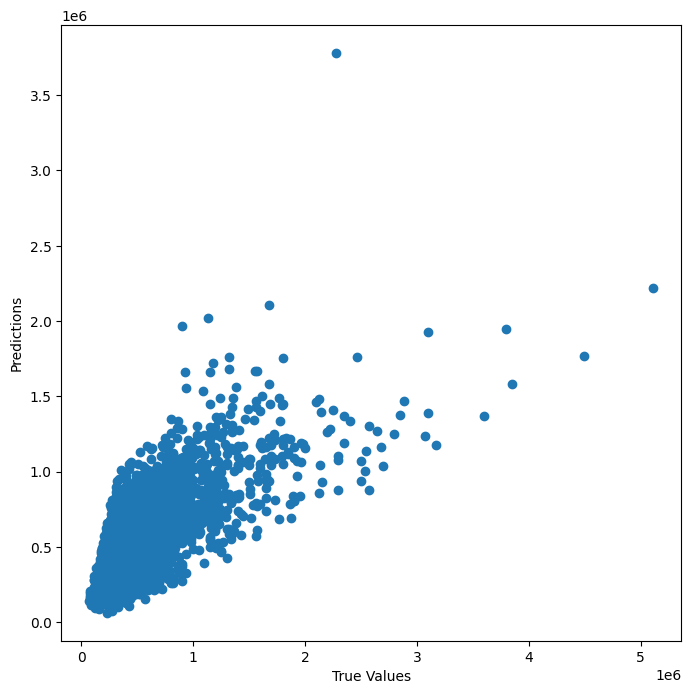

In [118]:
plt.figure(figsize=(8, 8))

plt.scatter(test_labels,
            test_predictions)

plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

In [205]:
#--- Sequential model ---#
model = Sequential()

model.add(Dense(units = 1,
                input_dim = 1,
                kernel_initializer = 'uniform',
                activation = 'linear'
               )
         )

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [206]:
weights = model.layers[0].get_weights()
print("Amount of weights: %.2f" % len(weights))
print(weights)



Amount of weights: 2.00
[array([[0.03653554]], dtype=float32), array([0.], dtype=float32)]


In [207]:
weights_initial = weights[0]
bias_initial = weights[1]

print('w: %.2f , b: %.2f'%(weights_initial, bias_initial))


w: 0.04 , b: 0.00


C:\Users\99Tho\AppData\Local\Temp\ipykernel_11072\2430893203.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w: %.2f , b: %.2f'%(weights_initial, bias_initial))


In [209]:
model.compile(optimizer = 'sgd',
              loss = 'mse',
              metrics = ['mae']
             )
         

In [210]:
history = model.fit(train_data,
                    train_labels,
                    validation_split = 0.2,
                    epochs = 300,
                    verbose = 1)

Epoch 1/300
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 143930949632.0000 - mae: 252986.9062 - val_loss: 63661649920.0000 - val_mae: 173327.1562
Epoch 2/300
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69113430016.0000 - mae: 174893.9375 - val_loss: 64485724160.0000 - val_mae: 177653.3125
Epoch 3/300
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74744725504.0000 - mae: 180518.2812 - val_loss: 63584563200.0000 - val_mae: 171955.1094
Epoch 4/300
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69436481536.0000 - mae: 173699.7656 - val_loss: 63629885440.0000 - val_mae: 173008.3438
Epoch 5/300
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67515060224.0000 - mae: 173335.4062 - val_loss: 63667621888.0000 - val_mae: 173385.4062
Epoch 6/300
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68514349056.0000 - mae: 173468.1406 - val_loss: 64019849216.0000 - val_mae: 175655.5469
Epoch 7/300
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69712420864.0000 - mae: 176220.8594 - val_lo

In [211]:
def plot_history(history):

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mae']),
             label='Train Loss')  # Changed to 'mae'
    plt.plot(history.epoch, np.array(history.history['val_mae']),
             label='Val Loss')  # Changed to 'val_mae'
    
    #plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
        #label = 'Train Loss')
    #plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
        #label = 'Val loss')

    plt.legend()
    plt.show()

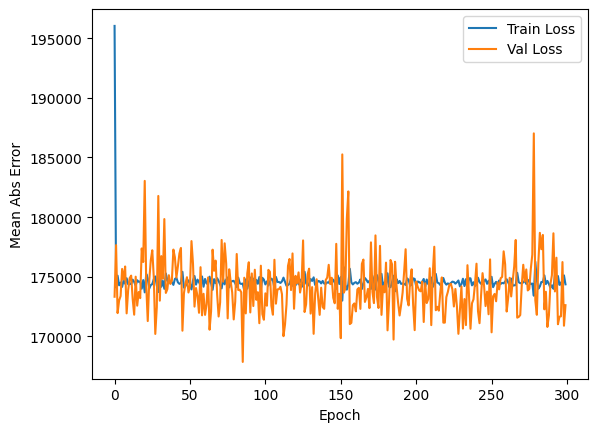

In [212]:
plot_history(history)

In [213]:
weights = model.layers[0].get_weights()
weights_final = weights[0]
bias_finals = weights[1]

weights_final

array([[254752.44]], dtype=float32)

In [224]:
result = model.predict(train_data)

541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


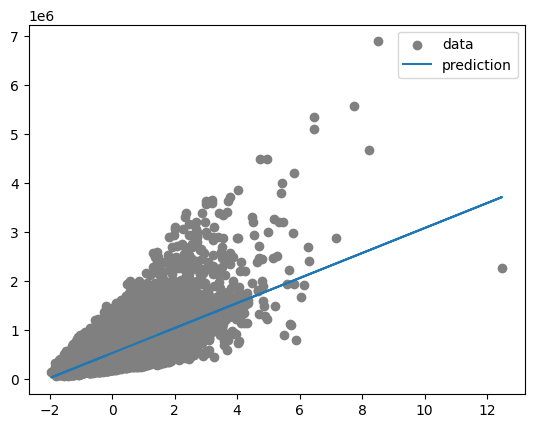

In [215]:
plt.scatter(train_data,
            train_labels,
            label = 'data',
            color = 'grey')
plt.plot(train_data,
         result,
         label = 'prediction')

plt.legend()
plt.show()

In [216]:
[loss, mae] = model.evaluate(test_data,
                             test_labels,
                             verbose = 1)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 71635812352.0000 - mae: 171404.4844


In [217]:
import math
math.sqrt(loss)

266856.455556166

In [218]:
print('Testing set Mean Abs Error: ${:7.2f}'.format(mae))

print('Testing set loss:{:7.2f}'.format(loss))

Testing set Mean Abs Error: $172486.77
Testing set loss:71212367872.00


In [220]:
test_predictions = model.predict(test_data).flatten()

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step


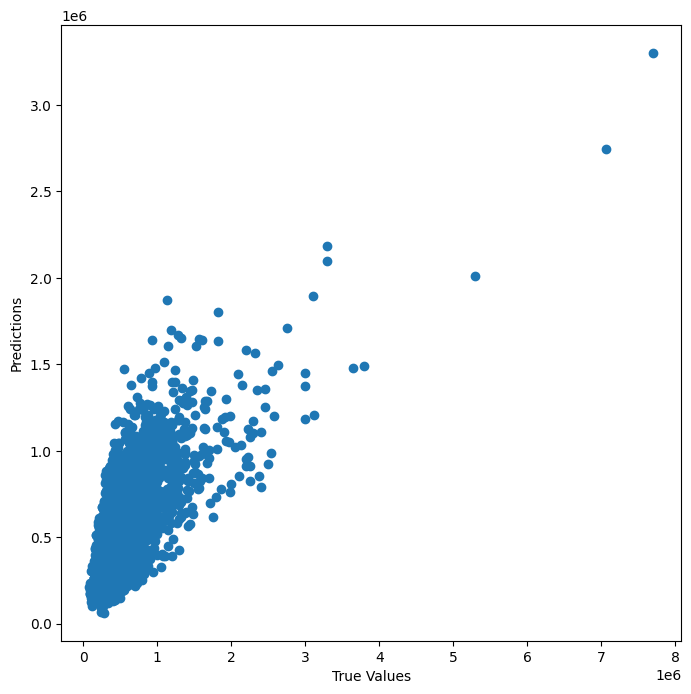

In [221]:
plt.figure(figsize=(8, 8))

plt.scatter(test_labels, test_predictions)

plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

In [225]:
print('R^2 score for training data: %.2f' % r2_score(train_labels, result))
print('R^2 score for test data: %.2f' % r2_score(test_labels, test_predictions))

R^2 score for training data: 0.49
R^2 score for test data: 0.49


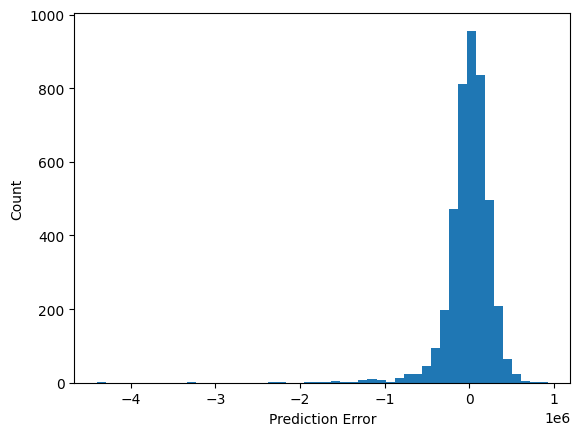

In [226]:
error = test_predictions - test_labels

plt.hist(error, bins = 50)

plt.xlabel('Prediction Error')

plt.ylabel('Count')

plt.show()